# **AN HYPOTHESIS TESTING OF A PARIS-BASED CAR SHARING SERVICE**

### **DEFINING THE QUESTION**

 

*  ***HO***= Null Hypothesis 
*  ***H1***= Alternative Hypothesis
*  ***m1***= During weekends, the mean number of blue cars taken is equal to the mean number of cars returned.


*   ***m2***= During weekends, the mean number of blue cars taken is not equal to the mean number of cars returned.

* ***HO***: ***m1=m2**
*   ***H1***: ***m1!=m2***

Our research problem is to figure out how the mean of blue cars taken compares to blue cars being returned over the weekends.
 

### **LOADING OUR LIBRARIES AND DATASETS**

In [178]:
# IMPORT THE NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import random
from math import sqrt
from matplotlib import pyplot as plt


In [179]:
# LOAD THE AUTOLIB DATASET

df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [180]:
# LOAD THE GLOSSARY 

glossary = pd.read_excel('/content/columns_explanation.xlsx')
glossary

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


### **READING, CHECKING AND CLEANING THE DATA**

In [181]:
df.sample(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
1781,75012,3/10/2018,1440,5,weekend,661,656,12,14,46,49,199,201
13950,94150,2/18/2018,1438,6,weekend,33,22,3,3,1,0,0,0
7868,92330,3/16/2018,1440,4,weekday,39,38,1,1,5,2,5,6
7292,92290,5/3/2018,1439,3,weekday,10,13,1,1,3,3,0,0
4698,92110,1/21/2018,1440,6,weekend,28,26,2,2,1,0,0,0


In [182]:
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [183]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [184]:
df.count()

Postal code               16085
date                      16085
n_daily_data_points       16085
dayOfWeek                 16085
day_type                  16085
BlueCars_taken_sum        16085
BlueCars_returned_sum     16085
Utilib_taken_sum          16085
Utilib_returned_sum       16085
Utilib_14_taken_sum       16085
Utilib_14_returned_sum    16085
Slots_freed_sum           16085
Slots_taken_sum           16085
dtype: int64

In [185]:
df.shape

(16085, 13)

In [186]:
# lets check for duplicates and get rid if any
# then return a non duplicated dataset

def duplicates(data):
  out = df.duplicated().any()
  if out == False:
    return out
  else:
    pass

duplicates(df)

False

In [187]:
# LETS CHECK FOR MISSING DATA 

def missing(data):
  out = df.isnull().any()

  if out == False:
    return out
  else:
    pass

In [188]:
df.isnull().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

In [189]:
# lets check for accuracy percentage by missing values check

miss = df.isnull().sum().sort_values(ascending=False)

percentage = (df.isnull().sum()/len(df)).sort_values(ascending=False)

# storing it in a dataframe
miss_values = pd.DataFrame({'MISSING': miss, 'Percent': percentage})
#return miss_values
miss_values

,MISSING,Percent
Slots_taken_sum,0,0.0
Slots_freed_sum,0,0.0
Utilib_14_returned_sum,0,0.0
Utilib_14_taken_sum,0,0.0
Utilib_returned_sum,0,0.0
Utilib_taken_sum,0,0.0
BlueCars_returned_sum,0,0.0
BlueCars_taken_sum,0,0.0
day_type,0,0.0
dayOfWeek,0,0.0


There are no missing values

Since our hypothesis is only about blue cars, we shall have to drop the unnecessary columns 

In [190]:
# first lets check the columns we have
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [191]:
# dropping unnecessary columns
df_new = df.drop(columns=[ 'n_daily_data_points','Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'])

### **SAMPLING AND MORE CLEANING**

We are only going to be working with the weekends so we shall drop all weekday rows. We shall do this by sampling the weekend day types.
Lets name our sample autolib.


In [192]:
df2= df_new[df_new['day_type'].str.contains("weekend")]
df2.sample(3)

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
4684,92110,1/7/2018,6,weekend,28,27
5432,92150,5/26/2018,5,weekend,162,164
9755,92700,4/14/2018,5,weekend,155,156


In [193]:
code = np.sort(df2['Postal code'].unique())
code

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [194]:
# we want our data to have only two postal codes for the weekend
import random

#setting up a seed so that all the code can be run and give the same results

random.seed(0)
print ("Choosing 2 random Postal Codes from the dataset",random.sample(list(code), k=2))

Choosing 2 random Postal Codes from the dataset [92320, 94450]


In [247]:
PC1 = 92320
PC2 = 94450
autolib = df2.loc[(df2['Postal code'] == PC1) | (df2['Postal code'] == PC2)] 
autolib

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
7646,92320,1/6/2018,5,weekend,83,82
7647,92320,1/7/2018,6,weekend,79,85
7653,92320,1/13/2018,5,weekend,82,93
7654,92320,1/14/2018,6,weekend,80,78
7660,92320,1/20/2018,5,weekend,74,82
...,...,...,...,...,...,...
15132,94450,6/3/2018,6,weekend,18,24
15138,94450,6/9/2018,5,weekend,27,25
15139,94450,6/10/2018,6,weekend,28,29
15145,94450,6/16/2018,5,weekend,21,20


In [196]:
autolib.shape

(88, 6)

In [197]:
len(autolib)

88

In [248]:
# lets fix the messiness in the columns

autolib.rename(columns = {'Postal code': 'postal_code', 'dayOfWeek':'day',	'BlueCars_taken_sum':'bluecars_taken','BlueCars_returned_sum':'bluecars_returned'}, inplace=True)

#autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
#autolib.columns.str.strip().str.lower().str.replace('', '_').str.replace('(','').str.replace(')','')
autolib.sample(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,postal_code,date,day,day_type,bluecars_taken,bluecars_returned
7772,92320,5/26/2018,5,weekend,87,73
15146,94450,6/17/2018,6,weekend,22,22


In [199]:
# lets check for unique values in all of our columns
column = autolib.columns.to_list()

for column in column:
    print("\n")
    print("Column Name:", column)
    print(autolib[column].unique())



Column Name: postal_code
[92320 94450]


Column Name: date
['1/6/2018' '1/7/2018' '1/13/2018' '1/14/2018' '1/20/2018' '1/21/2018'
 '1/27/2018' '1/28/2018' '2/3/2018' '2/4/2018' '2/10/2018' '2/11/2018'
 '2/17/2018' '2/18/2018' '2/24/2018' '3/3/2018' '3/4/2018' '3/10/2018'
 '3/11/2018' '3/17/2018' '3/18/2018' '3/24/2018' '3/25/2018' '3/31/2018'
 '4/1/2018' '4/7/2018' '4/8/2018' '4/14/2018' '4/15/2018' '4/21/2018'
 '4/22/2018' '4/28/2018' '4/29/2018' '5/5/2018' '5/6/2018' '5/20/2018'
 '5/26/2018' '5/27/2018' '6/2/2018' '6/3/2018' '6/9/2018' '6/10/2018'
 '6/16/2018' '6/17/2018']


Column Name: day
[5 6]


Column Name: day_type
['weekend']


Column Name: bluecars_taken
[83 79 82 80 74 88 73 97 71 76 77  4 69 90 86 75 67 54 59 68 64 72 55 57
 44 87 92 16 22 20 29 15 26 34 25 24 38  0 17 19 18 21 10 27 14 28 12 32]


Column Name: bluecars_returned
[ 82  85  93  78  87  95  74 103  72  71  81  91   7  64  86  90  80  83
  60  77  61  69  65  70  94  67  59  54  73  99  75 102  19  18  28  25

Looks like we have good values so we shall for outliers next.


In [200]:
autolib.columns

Index(['postal_code', 'date', 'day', 'day_type', 'bluecars_taken',
       'bluecars_returned'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


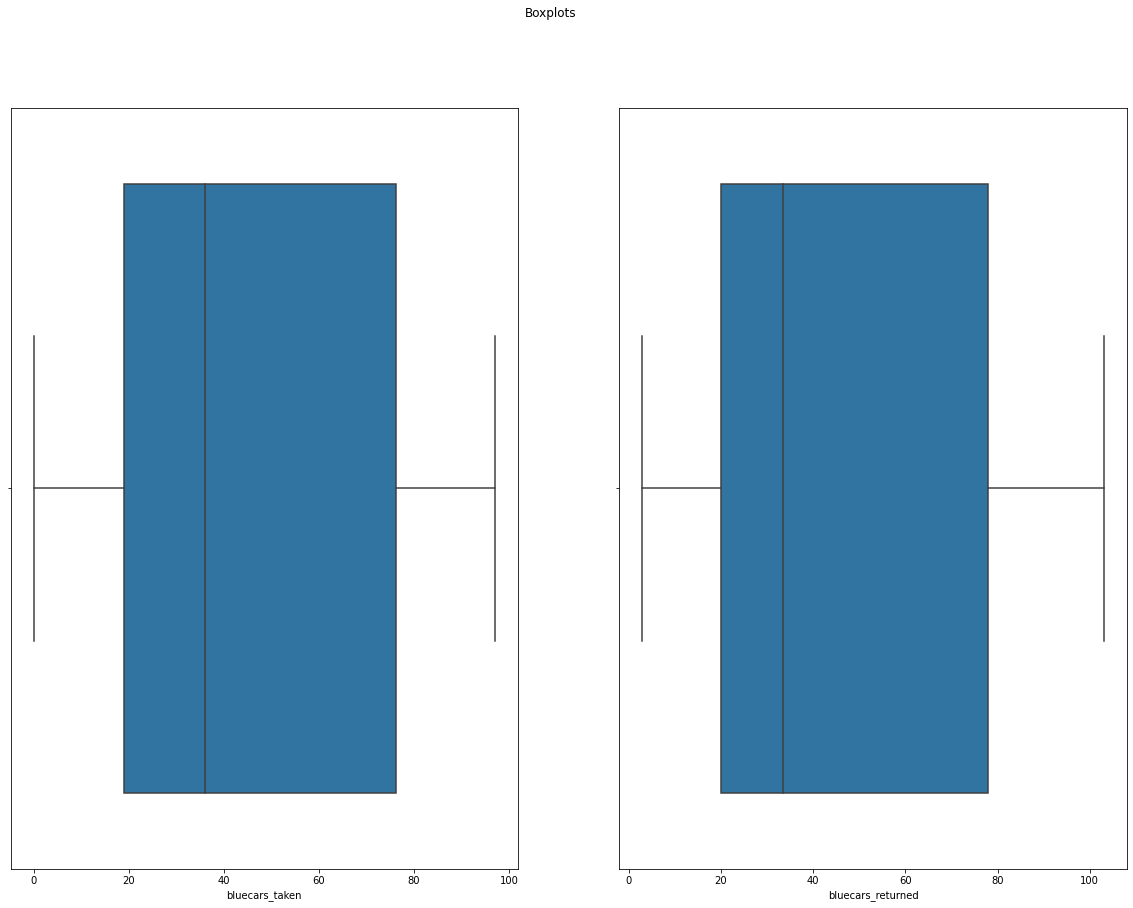

In [201]:

fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(20, 14))
fig.suptitle('Boxplots')

sns.boxplot(autolib['bluecars_taken'], ax=ax1)
sns.boxplot(autolib['bluecars_returned'], ax=ax2)


plt.show()


Our sample has no outliers so We shall then check for anomalies


In [202]:

Q1= autolib.quantile(0.25)
Q3 =autolib.quantile(0.75)
IQR = Q3-Q1
print(Q1)
print('----------------------------------------')
print(Q3)
print('----------------------------------------')
print(IQR)

postal_code          92320.0
day                      5.0
bluecars_taken          19.0
bluecars_returned       20.0
Name: 0.25, dtype: float64
----------------------------------------
postal_code          94450.00
day                      6.00
bluecars_taken          76.25
bluecars_returned       78.00
Name: 0.75, dtype: float64
----------------------------------------
postal_code          2130.00
day                     1.00
bluecars_taken         57.25
bluecars_returned      58.00
dtype: float64


In [203]:
autolib.isnull().any()

postal_code          False
date                 False
day                  False
day_type             False
bluecars_taken       False
bluecars_returned    False
dtype: bool

##**ANALYSIS**

### **UNIVARIATE**

In [204]:
whole =autolib[['bluecars_taken','bluecars_returned']]
whole.describe()

,bluecars_taken,bluecars_returned
count,88.000000,88.000000
mean,47.272727,48.545455
std,29.609616,31.055719
min,0.000000,3.000000
25%,19.000000,20.000000
50%,36.000000,33.500000
75%,76.250000,78.000000
max,97.000000,103.000000


In [205]:
MO = autolib.mode()
MO.head(1)

,postal_code,date,day,day_type,bluecars_taken,bluecars_returned
0,92320.0,1/13/2018,5.0,weekend,16.0,20.0


In [206]:
cars = autolib[['bluecars_taken','bluecars_returned']]

QU = cars.quantile([0.25,0.5,0.75])
print(QU)

      bluecars_taken  bluecars_returned
0.25           19.00               20.0
0.50           36.00               33.5
0.75           76.25               78.0


In [207]:
cars.skew()

bluecars_taken       0.150059
bluecars_returned    0.208011
dtype: float64

In [208]:
cars.kurt()

bluecars_taken      -1.672512
bluecars_returned   -1.633493
dtype: float64

In [209]:
cars.mean()

bluecars_taken       47.272727
bluecars_returned    48.545455
dtype: float64

The mean of cars taken and cars returned appears to be almost equal with a minute diiference. 


In [210]:
cars.median()

bluecars_taken       36.0
bluecars_returned    33.5
dtype: float64

In [211]:
cars.var()

bluecars_taken       876.729363
bluecars_returned    964.457680
dtype: float64

In [212]:
cars.std()

bluecars_taken       29.609616
bluecars_returned    31.055719
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


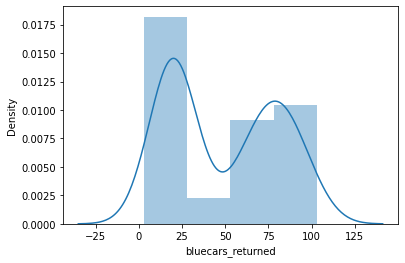

In [213]:

sns.distplot(autolib['bluecars_returned'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


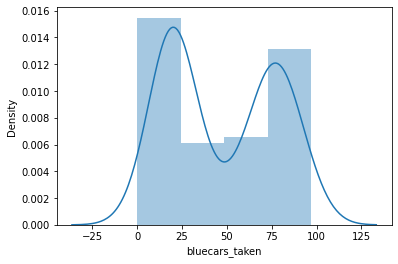

In [214]:
sns.distplot(autolib['bluecars_taken'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


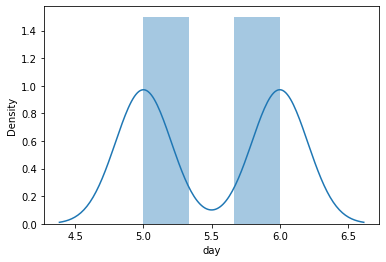

In [215]:
sns.distplot(autolib['day'])

In [216]:
days = autolib[['bluecars_taken','bluecars_returned','day']]
days

,bluecars_taken,bluecars_returned,day
7646,83,82,5
7647,79,85,6
7653,82,93,5
7654,80,78,6
7660,74,82,5
...,...,...,...
15132,18,24,6
15138,27,25,5
15139,28,29,6
15145,21,20,5


Text(0, 0.5, 'Frequency')

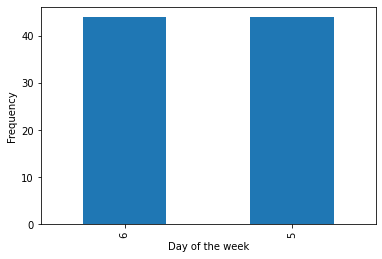

In [217]:

# Check frequency of day of the week
d=autolib['day'].value_counts()
d.plot.bar()
plt.xlabel('Day of the week')
plt.ylabel('Frequency')

There is no big diffence between the number of cars taken and returned during the weekend.

Text(0, 0.5, 'Frequency')

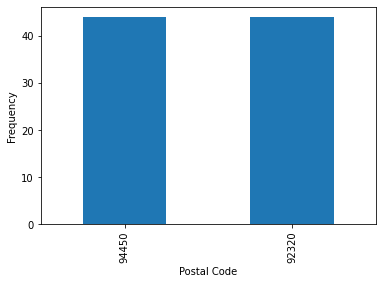

In [218]:
# Check frequency by the postal codes

d=autolib['postal_code'].value_counts()
d.plot.bar()
plt.xlabel('Postal Code')
plt.ylabel('Frequency')

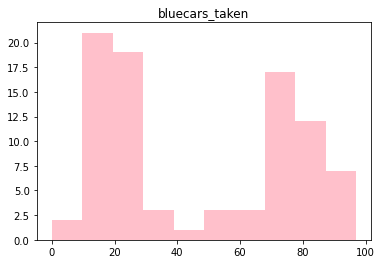

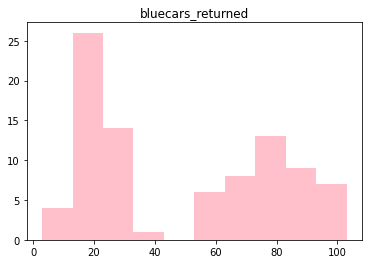

In [219]:
columnss = ['bluecars_taken', 'bluecars_returned']

for col in columnss:

  plt.hist(autolib[col],bins=10,color="pink")
  plt.title(col)

  plt.show()

### **BIVARIATE**

In [233]:
autolib.sample(5)

,Postal code,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
date,,,,,
2018-03-11,94450,6,weekend,18,16
2018-03-10,94450,5,weekend,16,16
2018-02-17,94450,5,weekend,24,20
2018-02-04,92320,6,weekend,71,87
2018-02-03,94450,5,weekend,34,29


                   bluecars_taken  bluecars_returned
bluecars_taken           1.000000           0.979978
bluecars_returned        0.979978           1.000000


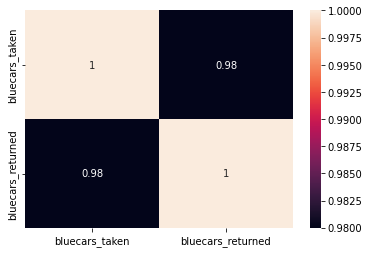

In [221]:
# FINDING THE CORRELATION

corr=cars.corr()
print(corr)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

There's a high correlation

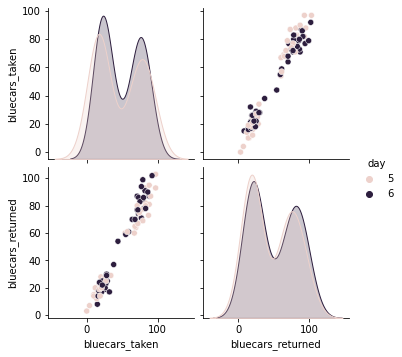

In [222]:

p = sns.pairplot(autolib, diag_kind="kde", hue="day",vars=["bluecars_taken", "bluecars_returned"])
plt.show()

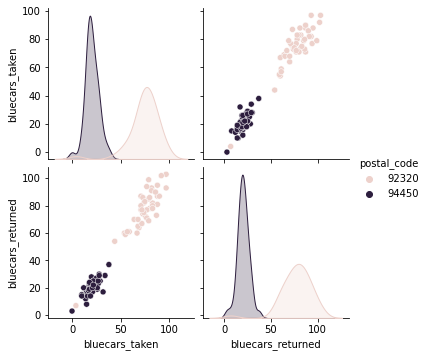

In [223]:
p = sns.pairplot(autolib, diag_kind="kde", hue="postal_code",vars=["bluecars_taken", "bluecars_returned"])
plt.show()

## **HYPOTHESIS TESTING**

In [224]:
# lets check for normality of our distribution
# importing the shapiro function
from scipy.stats import shapiro 

# test for normality
stat, r = shapiro(autolib['bluecars_taken'])

print('Statistics=%.3f, p=%.3f' % (stat, r))

# interpreting
alpha = 0.05
if r > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
 
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot



Statistics=0.864, p=0.000
Sample does not look Gaussian


In [254]:
from scipy.stats import shapiro 

# test for normality
stat, r = shapiro(autolib['bluecars_returned'])

print('Statistics=%.3f, p=%.3f' % (stat, r))

# interpreting
alpha = 0.05
if r > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
 
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

Statistics=0.862, p=0.000
Sample does not look Gaussian


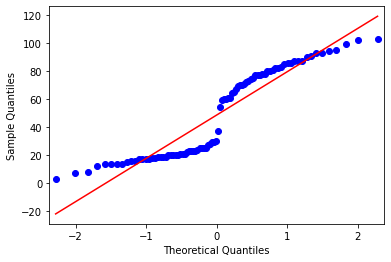

In [225]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(autolib['bluecars_returned'], line='s')
pyplot.show()

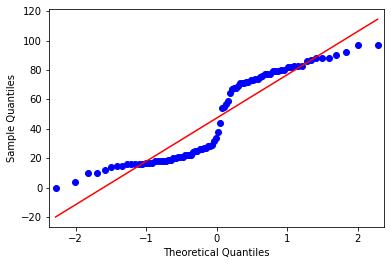

In [255]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(autolib['bluecars_taken'], line='s')
pyplot.show()

Timeline of cars taken and returned. First lets convert date to date time and set it as an index

In [249]:
#convert the date to datetime and making it an index
#set date as index

autolib.set_index(autolib.date, drop=True,inplace=True)
autolib.sample()



,postal_code,date,day,day_type,bluecars_taken,bluecars_returned
date,,,,,,
2/4/2018,92320,2/4/2018,6,weekend,71,87


In [250]:
#convert the index to datetimeIndex
autolib.index = pd.to_datetime(autolib.index)
autolib.sample()



,postal_code,date,day,day_type,bluecars_taken,bluecars_returned
date,,,,,,
2018-01-27,94450,1/27/2018,5,weekend,15,17


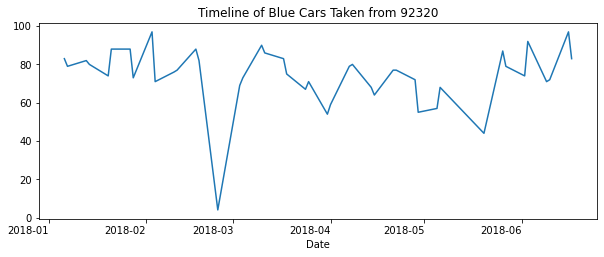

In [256]:
p1 = autolib[autolib['postal_code']== PC1]

plt.figure(figsize=(10,4))
p1['bluecars_taken'].plot()
plt.title('Timeline of Blue Cars Taken from 92320')
plt.xlabel('Date')
plt.xticks( rotation='horizontal')
plt.show()

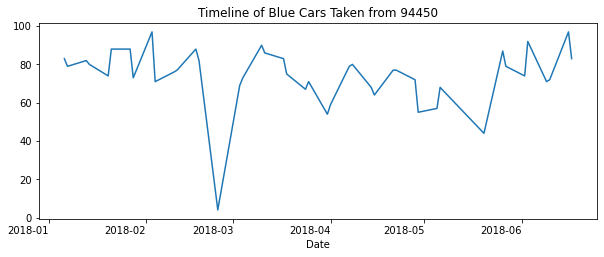

In [253]:
p2 = autolib[autolib['postal_code']== PC2]

plt.figure(figsize=(10,4))
p1['bluecars_taken'].plot()
plt.title('Timeline of Blue Cars Taken from 94450')
plt.xlabel('Date')
plt.xticks( rotation='horizontal')
plt.show()

Our data set shows that it does not resemble a normal distribution from our analysis several cells above hence we shall use non parametric tests. 
we are comparing the mean of cars taken and returned.

In [260]:
# lets perform a mann-whitney u test since we're comparing one pair

from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

# we already created our sample in autolib
# comparing samples
a = autolib['bluecars_taken']
b= autolib['bluecars_returned']

stat, p=mannwhitneyu(a,b)
print('Statistics=%.3f, p=%.3f' % (stat,p))
# interprete

alpha = 0.05
if p>alpha:
  print('Does not reject HO')
else:
  print('Rejects HO')

Statistics=3766.000, p=0.377
Does not reject HO


### **CONCLUSION**

From our sample size of 88, we fail to reject the null hypothesis. A Mannwhitneyu test was used to prove our hypothesis. We had a 95% confidence level and a 5% significance level.
The mean and number of blue cars taken and returned during weekends is equal. This means that all taken cars during the weekend are usually returned.

### **CHALLENGING THE SOLUTION**



*   A bigger sample size could have been used.
*   More postal codes could be used for the analysis and hypothesis testing


